(assignment-4)=
# Home assignment 4

In [2]:
!echo Last updated: `date +'%Y-%m-%d %H:%M:%S'`

Last updated: 2022-01-28 23:10:43


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 10
pd.options.display.max_columns = 10
pd.options.display.max_colwidth = 35
plt.rcParams['figure.figsize'] = (6, 6)

*****

## Question 1

> * Read the towns (`muni_il.shp`) layer (see {ref}`geopandas2-sample-data`).
> * Aggregate the towns layer according to the `'Muni_Eng'` column, to dissolve the separate polygons per town (see {ref}`geopandas-dissolve`).
> * Choose a city that starts with the same English letter as your first name (e.g., `"Metula"` if your first name is Michael).
> * Create a subset of the `towns` layer which includes the *neighbors* of (i.e., intersecting with) the town you selected.
> * *Plot* the resulting layer, using different colors for the selected town and for the neighbors.
> * Note that you cannot specify any specific town names or indices other than the string with the name of the selected town (e.g., `"Metula"`).

In [30]:
import geopandas as gpd
towns = gpd.read_file('data/muni_il.shp', encoding='utf-8')
towns = towns[['Muni_Eng', 'geometry']]
towns = towns.dissolve(by='Muni_Eng')
towns = towns.reset_index()
towns1 = towns[towns['Muni_Eng'] == 'Metula']
sel = towns.intersects(towns1['geometry'].iloc[0])
towns2 = towns[sel]

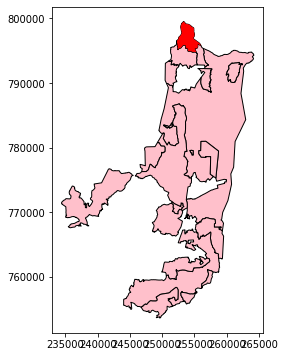

In [31]:
base = towns2.plot(edgecolor='black', color='pink')
towns1.plot(ax=base, color='red');

## Question 2

* Calculate and plot the density (stops per $km^2$) of public transport stops (`stops.txt`) per town (`muni_il.shp`). Go through the following steps.
* Read the towns (`muni_il.shp`) layer (see {ref}`geopandas2-sample-data`).
* Aggregate the towns layer according to the `'Muni_Heb'` column, to dissolve the separate polygons per town (see {ref}`geopandas-dissolve`).
* Read the `stops.txt` table and convert it to a point layer (see {ref}`point-layer-from-table`).
* Transform the stops layer to the CRS of towns (ITM).
* Calculate the number of stops per town. Hint: use spatial join to join stops to the towns layer, then use aggregation to get a table of stop counts per town, and, finally, join the counts table back to the towns layer.
* Calculate town area in $km^2$, then divide the stop count by area to get stops density.
* Plot the towns layer using using the `'Reds'` colormap (`cmap='Reds'`) with a legend (`legend=True`).

In [4]:
import pandas as pd
import geopandas as gpd
# Towns
towns = gpd.read_file('data/muni_il.shp', encoding='utf-8')
towns = towns[['Muni_Heb', 'geometry']]
towns = towns.dissolve(by='Muni_Heb')
towns = towns.reset_index()
# Stops
stops = pd.read_csv('data/gtfs/stops.txt')
stops = stops[['stop_id', 'stop_lon', 'stop_lat']]
geom = gpd.points_from_xy(stops['stop_lon'], stops['stop_lat'])
geom = gpd.GeoSeries(geom)
stops = gpd.GeoDataFrame(stops, geometry = gpd.GeoSeries(geom), crs = 4326)
stops = stops.to_crs(towns.crs)
# Calculate count per town
stops = gpd.sjoin(stops, towns, how='left')
stops = stops[['Muni_Heb', 'stop_id']].groupby('Muni_Heb').nunique().reset_index()
towns = pd.merge(towns, stops, on='Muni_Heb', how='left')
# Calculate density per town
towns['area_km2'] = towns.area / (1000**2)
towns['stops_per_km2'] = towns['stop_id'] / towns['area_km2']
towns

Muni_Heb                                           geometry  \
0          אבו גוש  POLYGON Z ((209066.649 635655.249 0.000, 20906...   
1         אבו סנאן  POLYGON Z ((212294.953 763168.812 0.000, 21229...   
2        אבן יהודה  POLYGON Z ((189803.359 684152.915 0.000, 18980...   
3       אום אל פחם  MULTIPOLYGON Z (((212458.789 712711.719 0.000,...   
4           אופקים  POLYGON Z ((164806.146 577898.834 0.000, 16453...   
..             ...                                                ...   
285          שפרעם  POLYGON Z ((215213.126 744570.395 0.000, 21515...   
286  תל אביב - יפו  POLYGON Z ((183893.870 668086.956 0.000, 18389...   
287        תל מונד  POLYGON Z ((190787.125 681015.000 0.000, 19056...   
288         תל שבע  POLYGON Z ((186092.189 571779.885 0.000, 18609...   
289            תמר  MULTIPOLYGON Z (((207660.539 552959.630 0.000,...   

     stop_id     area_km2  stops_per_km2  
0       27.0     1.891242      14.276336  
1       48.0     6.455340       7.435705  
2       64.0     8.141962       7.860514  
3       85.0    26.028286       3.265678  
4      137.0    16.352399       8.377975  
..       ...          ...            ...  
285    135.0    19.629682       6.877340  
286   1073.0    57.096785      18.792652  
287     13.0     7.126864       1.824084  
288     17.0     9.421072       1.804465  
289     55.0  1623.029870       0.033887  

[290 rows x 5 columns]

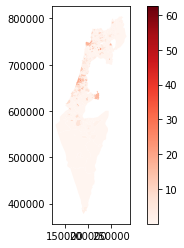

In [5]:
# Plot
towns.plot(column='stops_per_km2', cmap='Reds', legend=True);